In [139]:
# File operation
import os
import numpy as np
import pandas as pd
import logging
import missingno as msno
import scipy.stats as stats

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import altair as alt
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.io as pio
from IPython.display import Image
import plotly.io as pio
pio.renderers
pio.renderers.default = "svg"
import warnings
warnings.filterwarnings("ignore")

In [2]:
pip install missingno

Note: you may need to restart the kernel to use updated packages.


In [3]:
# create and configure logger
logging.basicConfig(filename='../logs/EDA.log', filemode='w', format='%(asctime)s - %(name)s - %(levelname)s - %(message)s',level=logging.DEBUG)
logger = logging.getLogger()

In [4]:
data_path = '../data/data.csv' # path of where our data file is located 

In [5]:
def read_data(data_path):
    
    '''this function read a csv file that we will be used in this project,
    and it takes one variable which is the location or file path to where the file is located'''
    
    try:
        logger.debug(" !!! reading the file !!!!! \n")
        data = pd.read_csv(data_path)
        
    except FileNotFoundError:
        print(" !!! Error File Not Found  !!!!! \n")
        logger.error(" !!! Error Program Failed !!!!! \n")
    
    except Exception as e:
        print(" !!! An exception occurred Error: {} ".format(e.__class__))
        logger.error(" !!! An exception occurred Error: {} ".format(e.__class__))
        
    return data

In [6]:
raw_data = read_data(data_path)# reading data
try:
    logger.debug(" !!! copying dataset !!!!! \n")
    df_data = raw_data.copy() #copying dataset to a new variable named df_data
    
except Exception as e:
    print("!!! An exception occurred Error: {} ".format(e.__class__))
    logger.error(" !!! An exception occurred Error: {} ".format(e.__class__))
    
logger.debug(" !!! displaying the head of the file !!!!! \n")
df_data.head() # displauing the first five elements of our dataset

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [7]:
df_data.describe().T #getting statistical analysiz

,count,mean,std,min,25%,50%,75%,max
id,569.0,3.037183e+07,1.250206e+08,8670.000000,869218.000000,906024.000000,8.813129e+06,9.113205e+08
radius_mean,569.0,1.412729e+01,3.524049e+00,6.981000,11.700000,13.370000,1.578000e+01,2.811000e+01
texture_mean,569.0,1.928965e+01,4.301036e+00,9.710000,16.170000,18.840000,2.180000e+01,3.928000e+01
perimeter_mean,569.0,9.196903e+01,2.429898e+01,43.790000,75.170000,86.240000,1.041000e+02,1.885000e+02
area_mean,569.0,6.548891e+02,3.519141e+02,143.500000,420.300000,551.100000,7.827000e+02,2.501000e+03
smoothness_mean,569.0,9.636028e-02,1.406413e-02,0.052630,0.086370,0.095870,1.053000e-01,1.634000e-01
compactness_mean,569.0,1.043410e-01,5.281276e-02,0.019380,0.064920,0.092630,1.304000e-01,3.454000e-01
concavity_mean,569.0,8.879932e-02,7.971981e-02,0.000000,0.029560,0.061540,1.307000e-01,4.268000e-01
concave points_mean,569.0,4.891915e-02,3.880284e-02,0.000000,0.020310,0.033500,7.400000e-02,2.012000e-01
symmetry_mean,569.0,1.811619e-01,2.741428e-02,0.106000,0.161900,0.179200,1.957000e-01,3.040000e-01


In [8]:
df_data.shape # checking the shape of the dataset

(569, 33)

In [9]:
df_data.info()  #checking the all posible information about of the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [10]:
# how many missing values exist or better still what is the % of missing values in the dataset?
def percent_missing(df):
    try:

        # Calculate total number of cells in dataframe
        logger.debug(" !!! Calculate total number of cells in dataframe !!!!! \n")
        totalCells = np.product(df.shape)

        # Count number of missing values per column
        logger.debug(" !!! Count number of missing values per column!!!!! \n")
        missingCount = df.isnull().sum()

        # Calculate total number of missing values
        logger.debug(" !!! Calculate total number of missing values !!!!! \n")
        totalMissing = missingCount.sum()

        # Calculate percentage of missing values
        
        print("The Breast cancer dataset contains", round(((totalMissing/totalCells) * 100), 2), "%", "missing values.")
        logger.info(" all nones from The Breast cancer dataset")
    except Exception as e:
        print("!!! An exception occurred Error: {} ".format(e.__class__))
        logger.error(" !!! An exception occurred Error: {} ".format(e.__class__))


In [11]:
        
percent_missing(df_data)

The Breast cancer dataset contains 3.03 % missing values.


In [12]:
# Now which column(s) has missing values
df_data.isna().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

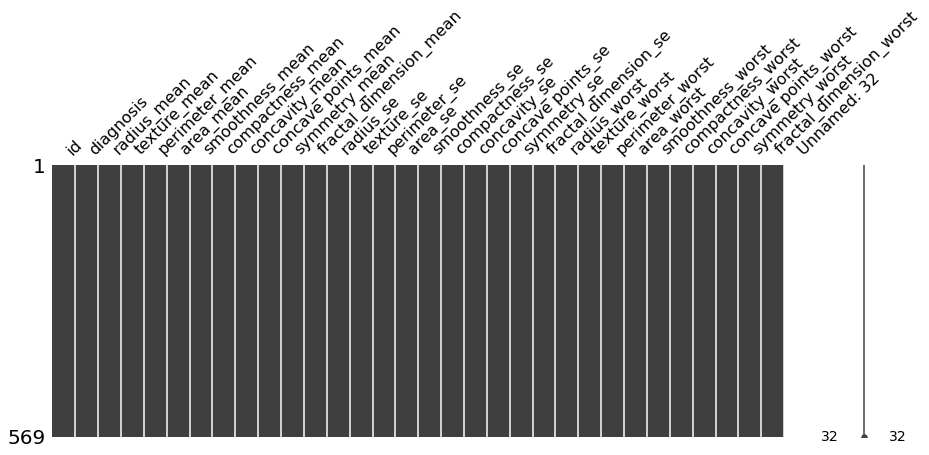

In [13]:
# Check the missing values with a graph 

msno.matrix(df_data, figsize=(15,5));

from the above results it can be een that we have missing values from one column wchich is unamed and for better analysis we can drop it from our dataet

In [14]:
# Drop unnecessary columns

df_data.drop(["id", "Unnamed: 32"], axis=1, inplace=True)

In [15]:
column=[]
for columns in df_data.columns:
    if columns == 'diagnosis':
        continue
    else:
        column.append(columns)


In [16]:
column

['radius_mean',
 'texture_mean',
 'perimeter_mean',
 'area_mean',
 'smoothness_mean',
 'compactness_mean',
 'concavity_mean',
 'concave points_mean',
 'symmetry_mean',
 'fractal_dimension_mean',
 'radius_se',
 'texture_se',
 'perimeter_se',
 'area_se',
 'smoothness_se',
 'compactness_se',
 'concavity_se',
 'concave points_se',
 'symmetry_se',
 'fractal_dimension_se',
 'radius_worst',
 'texture_worst',
 'perimeter_worst',
 'area_worst',
 'smoothness_worst',
 'compactness_worst',
 'concavity_worst',
 'concave points_worst',
 'symmetry_worst',
 'fractal_dimension_worst']

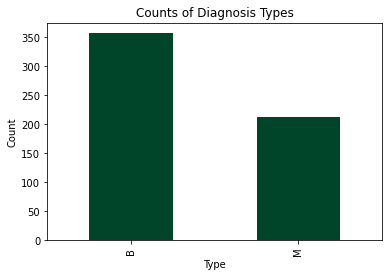

In [52]:
# categorical analysis
df_data.diagnosis.value_counts().plot(kind="bar", 
                                 title="Counts of Diagnosis Types", 
                                 xlabel="Type", 
                                 ylabel="Count", 
                                 colormap="YlGn_r");

In [54]:
# Splitting columns by fields for better analysis

mean_columns = df_data.iloc[:, 1:11]
se_columns = df_data.iloc[:, 11: 21]
worst_columns = df_data.iloc[:, 21:31]

In [55]:
fields = ["mean", "se", "worst"]
columns = ["radius", "texture", "perimeter", "area", "smoothness", "compactness", "concavity", "concave points", "symmetry", "fractal_dimension"]

#### Relationship Between Features & Diagnosis

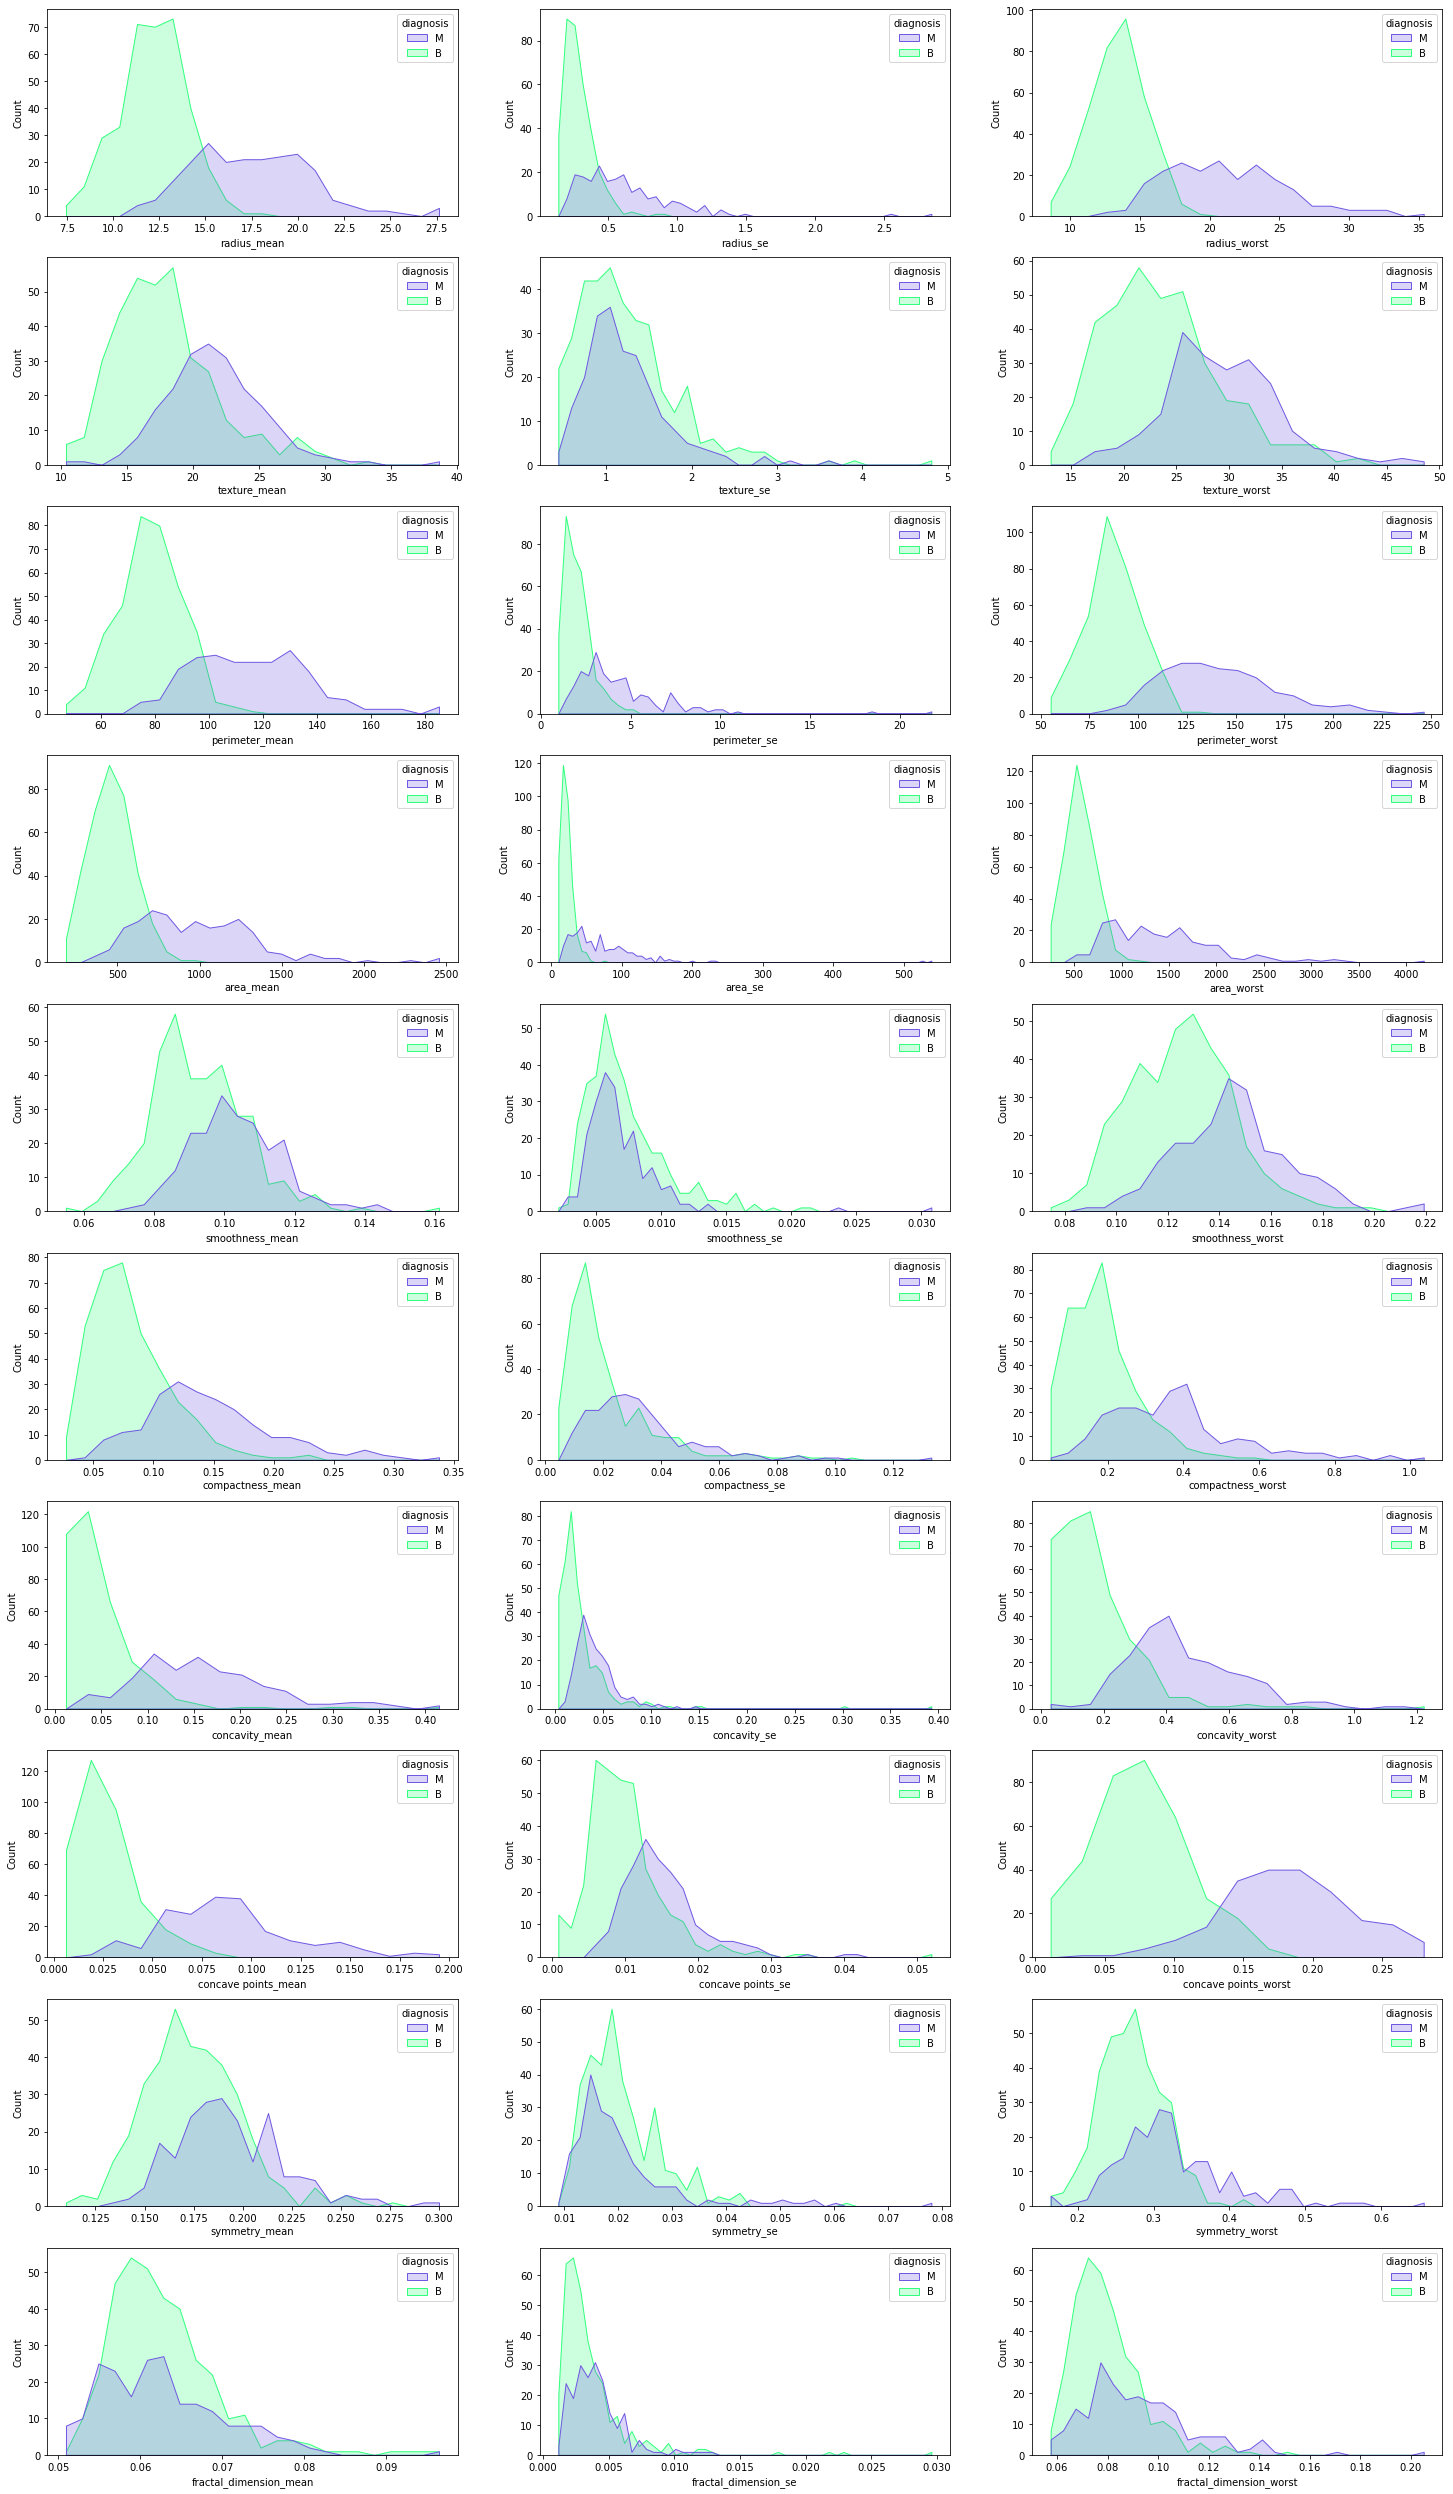

In [60]:
fig, axs = plt.subplots(10,3, figsize=(25,45))

for col in range(len(columns)):
    
    for f in range(len(fields)):
        
        sns.histplot(df_data, 
                     x=columns[col]+"_"+fields[f], 
                     hue="diagnosis", element="poly", 
                     stat="count", 
                     palette=["#7158e2", "#32ff7e"],
                     ax=axs[col][f])
        
                                    '''DOUBLE CLICK TO ZOOM IN AND OUT'''

#### Relationship Between Features & Features

In [61]:
def heat(data, color, size):#function to plot heatmaps
    try:
    
        corr = data.corr()
        mask = np.zeros_like(corr, dtype=np.bool)
        mask[np.triu_indices_from(corr)] = True

        plt.figure(figsize=size)
        sns.heatmap(corr, mask=mask, annot=True, cmap=color)
        logger.debug(" !!! plotting the graph !!!!! \n")
        plt.show()
    except Exception as e:
            print("!!! An exception occurred Error: {} ".format(e.__class__))
            logger.error(" !!! An exception occurred Error: {} ".format(e.__class__))


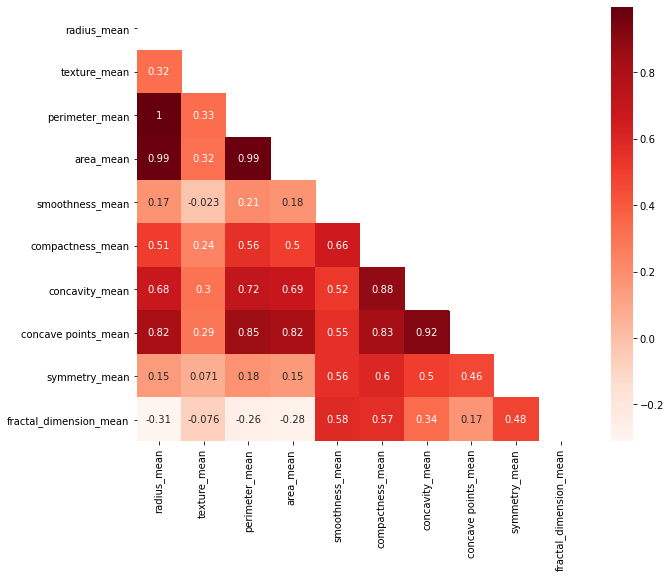

In [67]:
heat(mean_columns, "Reds", (10,8))

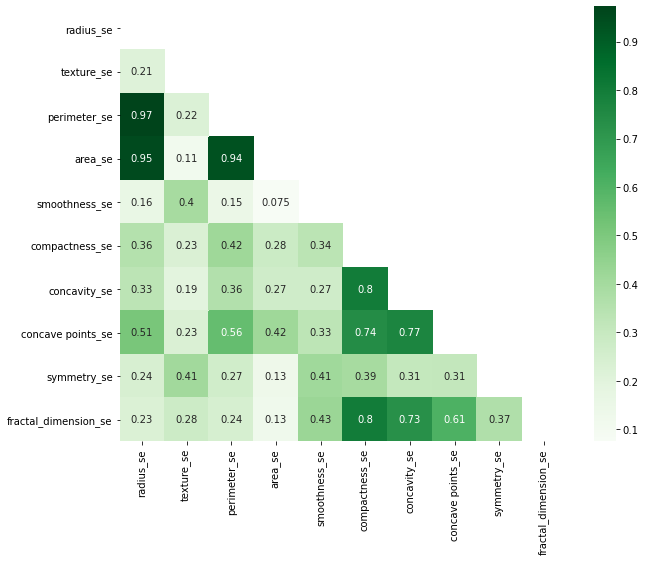

In [68]:
heat(se_columns, "Greens", (10,8))

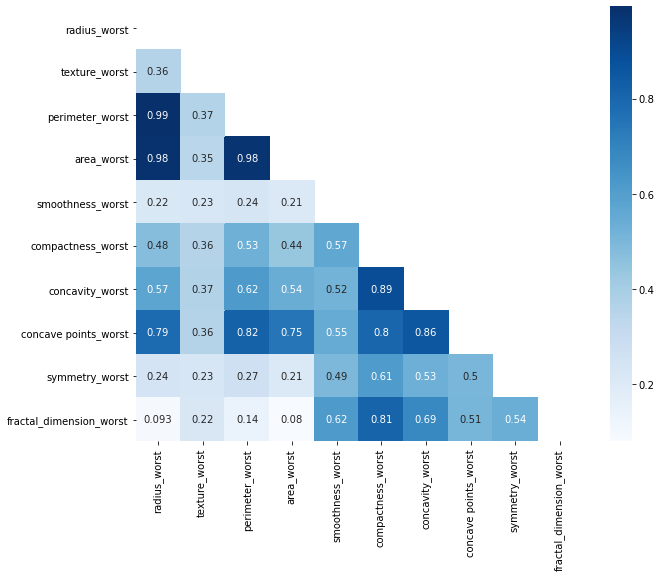

In [66]:
heat(worst_columns, "Blues", (10,8))

#### With heatmaps, we can see correlation between this columns:
    perimeter - radius
    area - radius
    area - perimeter
    concavity - compactness
    fractal_dimension - compactness
    concave points - compactness
    concave points - concavity
    concave points - radius
    concave points - perimeter
    concave points - area


In [144]:
def scatter_columns(feature1, feature2, df,title):
    '''function to plot the relatioship among 2 features
    takes dataset and two features to be plotted as arguments and returns a scatter plot '''
    try:
        
        fig = go.Figure()
        fig.update_layout(
            title=title,
            width=600,
            height=400,
            margin=dict(
                        l=20,
                        r=20,
                        t=40,
                        b=20,
                    )
        )

        fig.add_trace(go.Scatter(x=df[feature1+"_"+fields[0]], 
                                 y=df[feature2+"_"+fields[0]], 
                                 mode="markers", 
                                 name="mean",
                                 ))
        fig.add_trace(go.Scatter(x=df[feature1+"_"+fields[1]], 
                                 y=df[feature2+"_"+fields[1]], 
                                 mode="markers", 
                                 name="se",
                                 ))

        fig.add_trace(go.Scatter(x=df[feature1+"_"+fields[2]], 
                                 y=df[feature2+"_"+fields[2]], 
                                 mode="markers", 
                                 name="worst",
                                 ))
        
        logger.info(" !!! plotting scatter plot of: {} ".format(title))  
        
        Image(pio.to_image(fig, format='png', width=1200))
       
        fig.show()
        
        
        
      


    except Exception as e:
#         print("!!! An exception occurred Error: {} ".format(e.__class__))
        logger.error(" !!! An exception occurred Error: {} ".format(e.__class__))
        
    



In [141]:
# fig = px.histogram(data, x="char_length", marginal="box", nbins=500)
# Image(pio.to_image(fig, format='png', width=1200))

In [143]:
scatter_columns("perimeter", "radius", df_data,"Perimeter & Radius")

In [96]:
scatter_columns("area", "radius",df_data, "Area & Radius")

In [98]:
scatter_columns("area", "perimeter",df_data, "Area & Perimeter")

In [100]:
scatter_columns("concavity", "compactness", df_data,"Concavity & Compactless")

In [101]:
scatter_columns("fractal_dimension", "compactness", df_data,"Fractal Dimension & Compactness")

In [105]:
cols = ["radius", "perimeter", "area", "compactness", "concavity"]

fig = make_subplots(rows=5, cols=1, 
                    subplot_titles=[ "Radius & Concave Points",
                                     "Perimeter & Concave Points",
                                     "Area & Concave Points",
                                     "Compactness & Concave Points",
                                     "Concavity & Concave Points",
                                    ])
    
for i in range(len(cols)):
    
    fig.update_layout(
    width=900,
    height=1600,
    margin=dict(
                l=40,
                r=40,
                t=30,
                b=0,
            )
    )
    
    fig.update_xaxes(title_text=cols[i], row=i+1, col=1)
    fig.update_yaxes(title_text="concave points", row=i+1, col=1)
    
    fig.add_trace(go.Scatter(x=df_data[cols[i]+"_"+fields[0]],
                             y=df_data["concave points"+"_"+fields[0]], 
                             mode="markers", 
                             name="mean",
                             ),
                  row=i+1,
                  col=1,
                 )

    fig.add_trace(go.Scatter(x=df_data[cols[i]+"_"+fields[1]], 
                             y=df_data["concave points"+"_"+fields[1]], 
                             mode="markers", 
                             name="se",
                             ),
                 
                  row=i+1,
                  col=1,
                 )

    fig.add_trace(go.Scatter(x=df_data[cols[i]+"_"+fields[2]], 
                             y=df_data["concave points"+"_"+fields[2]], 
                             mode="markers", 
                             name="worst",
                            ),
                 
                  row=i+1,
                  col=1,
                 )
                             
fig.show()

In [106]:
# handling outliers if any
for col in range(len(columns)):
    
    for f in range(len(fields)):
        
        Q1 = df_data[columns[col]+"_"+fields[f]].quantile(0.25)
        Q3 = df_data[columns[col]+"_"+fields[f]].quantile(0.75)
        IQR = Q3 - Q1
        
        lower_bound = Q1 - 1.5*IQR
        upper_bound = Q3 + 1.5*IQR
        
        outliers = (df_data[columns[col]+"_"+fields[f]] < lower_bound) | (df_data[columns[col]+"_"+fields[f]] > upper_bound)
        df_data[columns[col]+"_"+fields[f]][outliers] = df_data[columns[col]+"_"+fields[f]].mean()

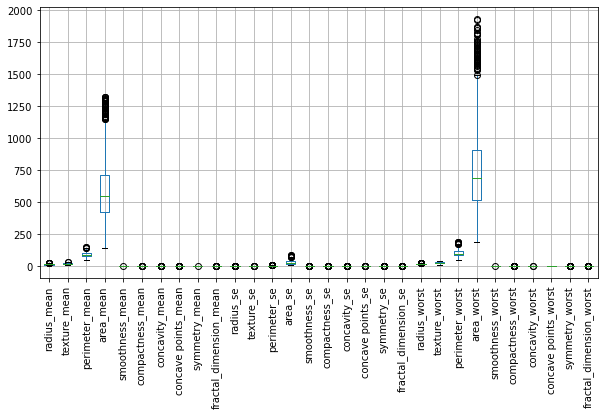

In [107]:
boxplot = df_data.boxplot(column,rot=90,figsize = (10,5))

In [46]:
# def remove_outlier(df_in, col_name):
#     try:
#         logger.debug(" !!! calculating the first quantile of the column!!!!! \n")
#         q1 = df_in[col_name].quantile(0.25) #calculating the first quantile of the column
#         logger.debug(" !!! calculating the third quantile of the column!!!!! \n")
#         q3 = df_in[col_name].quantile(0.75) #calculating the third quantile of the column
#         logger.debug(" !!! finding Interquartile range!!!!! \n")
#         iqr = q3-q1 #Interquartile range
#         fence_low  = q1-1.5*iqr
#         fence_high = q3+1.5*iqr
#         logger.debug(" !!! creating the cleanded dataset with no outliers!!!!! \n")
#         outliers = df_in.loc[(df_in[col_name] > fence_low) | (df_in[col_name] < fence_high)]
        
#     except Exception as e:
#         print(" !!! An exception occurred Error: {} ".format(e.__class__))
#         logger.error(" !!! An exception occurred Error: {} ".format(e.__class__))
#     return df_out
# # for col in range(len(columns)):
    
# #     for f in range(len(fields)):
        
# #         Q1 = df[columns[col]+"_"+fields[f]].quantile(0.25)
# #         Q3 = df[columns[col]+"_"+fields[f]].quantile(0.75)
# #         IQR = Q3 - Q1
        
# #         lower_bound = Q1 - 1.5*IQR
# #         upper_bound = Q3 + 1.5*IQR
        
# #         outliers = (df[columns[col]+"_"+fields[f]] < lower_bound) | (df[columns[col]+"_"+fields[f]] > upper_bound)
# #         df[columns[col]+"_"+fields[f]][outliers] = df[columns[col]+"_"+fields[f]].mean()

In [47]:
# for col_name in column:
#     df_clean = remove_outlier(df_data, col_name)

# # df_clean.head()

    

In [48]:
# #find Q1, Q3, and interquartile range for each column
# Q1 = df_data.quantile(q=.25)
# Q3 = df_data.quantile(q=.75)
# for columns in df_data.columns:
#     if columns == 'diagnosis':
#         continue
#     else:
#         IQR = df_data[columns].apply(stats.iqr)


# #only keep rows in dataframe that have values within 1.5*IQR of Q1 and Q3
# data_clean = df_data[~((df_data < (Q1-1.5*IQR)) | (df_data > (Q3+1.5*IQR))).any(axis=1)]

# #find how many rows are left in the dataframe 
# data_clean.mean()


In [49]:
# from scipy import stats

# def drop_numerical_outliers(df, z_thresh=3):
#     # Constrains will contain `True` or `False` depending on if it is a value below the threshold.
#     constrains = df.select_dtypes(include=[np.number]) \
#         .apply(lambda x: np.abs(stats.zscore(x)) < z_thresh) \
#         .all(axis=1)
#     # Drop (inplace) values set to be rejected
#     df.drop(df.index[~constrains], inplace=True)

In [50]:
# def drop_outliers(df, field_name):
#     distance = 1.5 * (np.percentile(df[field_name], 75) - np.percentile(df[field_name], 25))
#     df.drop(df[df[field_name] > distance + np.percentile(df[field_name], 75)].index, inplace=True)
#     df.drop(df[df[field_name] < np.percentile(df[field_name], 25) - distance].index, inplace=True)